In [1629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./.gitignore/data_a (Florent).csv", skipinitialspace = True) #Open the csv file with no space before and after the values


#Part 1 : cleaning the data

#A. Drop the duplicates

nb_of_duplicates = len(df)-len(df.drop_duplicates()) #How many duplicates do I have ?

if nb_of_duplicates != 0 :
    df.drop_duplicates(inplace=True)

#B. Empty cells :

df.isnull().sum() #How many empty cells are there for each column

cleaned_df = df.dropna(subset=['Price'])#Delete the 3992 empty price
cleaned_df = cleaned_df.dropna(subset=['Number of rooms'])#Delete the 1918 empty Number of rooms
cleaned_df = cleaned_df.dropna(subset=['Living Area'])#Delete the 11677 empty Living Area (60605 left)

cleaned_df["Garden"].fillna(False, inplace = True) #Replace NaN value by False in the Garden Column
cleaned_df["Furnished"].fillna(False, inplace = True) #Replace NaN value by False in the Furnished Column
cleaned_df["Fully equipped kitchen"].fillna(False, inplace = True) #Replace NaN value by False in the Furnished Column

del cleaned_df['Area of the terrace'] #Delete the column Area of the terrace
del cleaned_df['Area of the garden'] #Delete the column Area of the garden
del cleaned_df['State of the building'] #Delete the column State of the building
del cleaned_df['Surface area of the plot of land'] #Delete the column Surface area of the plot of land
del cleaned_df['Surface of the land'] #Delete the column Surface area of land
del cleaned_df['Number of facades'] #Delete the column Number of facades

nb_null_values = cleaned_df.isnull().sum()

#if nb_null_values > 0 : #How many empty cells are there for each column => Not working if time come back to it !
#    raise NameError(f"There are {nb_null_values} null values in the DB, be careful !")

#C. No blank spaces 
# Already done in the opening of the csv file



In [1630]:
#D. Data in wrong format

cleaned_df_formatted = cleaned_df.convert_dtypes() #convert all the dtypes in the best types for them
cleaned_df_formatted['Price'] = cleaned_df_formatted['Price'].astype(float)
cleaned_df_formatted['Living Area'] = cleaned_df_formatted['Living Area'].astype(float)
cleaned_df_formatted['Number of rooms'] = cleaned_df_formatted['Number of rooms'].astype(float)

#E. Wrong data

#print(cleaned_df_formatted.head(2))
#cleaned_df_formatted["Number of rooms"].value_counts() #Display the number of buildings
#cleaned_df_formatted["To sell"]cleaned_df_formatted["Price"].value_counts().head(20)


index_sell_to_del = cleaned_df_formatted[(cleaned_df_formatted['To sell'] == False)].index # taking the index of the row who are False to delete them on the next line
df_sell = cleaned_df_formatted.drop(index_sell_to_del) #Delete the rows collect the line above and store the new DF in df_sell
del df_sell['To rent'] #Delete the column "To rent" because it is useless now



index_rent_to_del = cleaned_df_formatted[(cleaned_df_formatted['To rent'] == False)].index # taking the index of the row who are False to delete them on the next line
df_rent = cleaned_df_formatted.drop(index_rent_to_del) #Delete the rows collect the line above and store the new DF in df_rent
del df_rent['To sell'] #Delete the column "To sell" because it is useless now


#Delete the extreme prices and extreme living area from df_rent and df_sell

df_rent.drop(df_rent[df_rent['Price'] >= 4000].index, inplace = True)
df_rent.drop(df_rent[df_rent['Living Area'] > 400].index, inplace = True)


In [1631]:
#Creating some specific Dataframe to plot

#Taking only the appartment and Rez-de-chausséet to rent 
df_rent_appart = df_rent[(df_rent.loc[ : ,'type'] == "Appartement") | (df_rent.loc[ : ,'type'] == "Rez-de-chaussée")]



In [1632]:
#calculating the price per squared m for the appartment and Rez-de-chaussée to rent
df_rent_appart.loc[ : ,'Price by squared m'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Living Area']

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/2646709362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart.loc[ : ,'Price by squared m'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Living Area']


In [1633]:
#calculating the price per bedroom m for the appartment and Rez-de-chaussée to rent

df_rent_appart.loc[ : ,'Price by bedroom'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Number of rooms']


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/2079557355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart.loc[ : ,'Price by bedroom'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Number of rooms']


In [1634]:
#Creating Datafram for renting houses

df_rent_house = df_rent[(df_rent.loc[ : ,'type'] == "Maison")]


In [1635]:
#Calculating the price per squared m for the maison to rent
df_rent_house['Price by squared m'] = df_rent_house['Price'] / df_rent_house['Living Area']

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/1646405401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_house['Price by squared m'] = df_rent_house['Price'] / df_rent_house['Living Area']


In [1636]:
#Calculating the price per bedroom m for the maison to rent
df_rent_house['Price by bedroom'] = df_rent_house['Price'] / df_rent_house['Number of rooms']


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/348671128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_house['Price by bedroom'] = df_rent_house['Price'] / df_rent_house['Number of rooms']


In [1637]:
#Creating Datafram for selling appartement and Rez-de-chaussée
#Taking only the appartment and Rez-de-chausséet to rent 
df_sell_appart = df_sell[(df_sell.loc[ : ,'type'] == "Appartement") | (df_sell.loc[ : ,'type'] == "Rez-de-chaussée")]
df_sell_appart.drop(df_sell_appart[(df_sell_appart['Price'] < 50000)].index, inplace=True) #Deleting the rows where the price are under 50 000 because some renting appart were true to sell so...

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/2882764614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart.drop(df_sell_appart[(df_sell_appart['Price'] < 50000)].index, inplace=True) #Deleting the rows where the price are under 50 000 because some renting appart were true to sell so...


In [1638]:
#Calculating the price per squared m for for selling appartement and Rez-de-chaussée
df_sell_appart['Price by squared m'] = df_sell_appart['Price'] / df_sell_appart['Living Area']


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/3129351279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart['Price by squared m'] = df_sell_appart['Price'] / df_sell_appart['Living Area']


In [1639]:
#Calculating the price by bedroom for for selling appartement and Rez-de-chaussée
df_sell_appart['Price by bedroom'] = df_sell_appart['Price'] / df_sell_appart['Number of rooms']

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/311229929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart['Price by bedroom'] = df_sell_appart['Price'] / df_sell_appart['Number of rooms']


In [1640]:
#Creating Datafram for selling houses

df_sell_house = df_sell[(df_sell.loc[ : ,'type'] == "Maison")]

df_sell_house.drop(df_sell_house[(df_sell_house['Price'] < 50000)].index, inplace=True) #Deleting the rows where the price are under 50 000 because some renting houses were true to sell so...

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/136224608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Price'] < 50000)].index, inplace=True) #Deleting the rows where the price are under 50 000 because some renting houses were true to sell so...


In [1641]:
#Calculating the price per squared m for for selling houses
df_sell_house['Price by squared m'] = df_sell_house['Price'] / df_sell_house['Living Area']

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/3124821883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house['Price by squared m'] = df_sell_house['Price'] / df_sell_house['Living Area']


In [1642]:
#Calculating the price by bedroom for for selling houses
df_sell_house['Price by bedroom'] = df_sell_house['Price'] / df_sell_house['Number of rooms']

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/875519261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house['Price by bedroom'] = df_sell_house['Price'] / df_sell_house['Number of rooms']


In [1643]:
#Part 2 : Data Analysis

#How many rows and columns ?

def how_many_columns_rows_df(df):
    vnames = [name for name in globals() if globals()[name] is df]#Getting the name of the df
    print(f"There are {df.shape[0]} rows in our database named {vnames[0]}") #How many rows ?
    print(f"There are {df.shape[1]} columns in our database named {vnames[0]}") #How many columns ?
    return None

how_many_columns_rows_df(cleaned_df_formatted)
how_many_columns_rows_df(df_rent_appart)
how_many_columns_rows_df(df_rent_house)

df_rent_appart.head(2)

There are 60605 rows in our database named cleaned_df_formatted
There are 14 columns in our database named cleaned_df_formatted
There are 8676 rows in our database named df_rent_appart
There are 15 columns in our database named df_rent_appart
There are 2043 rows in our database named df_rent_house
There are 15 columns in our database named df_rent_house


,Unnamed: 0,To rent,Price,Number of rooms,Living Area,Fully equipped kitchen,Furnished,Open fire,Terrace,Garden,Swimming pool,zipcode,type,Price by squared m,Price by bedroom
1,2718948,True,790.0,2.0,140.0,True,False,False,False,False,False,3200,Appartement,5.642857,395.0
3,3860205,True,520.0,2.0,50.0,True,False,False,False,False,False,6900,Appartement,10.400000,260.0


In [1644]:
#What is the correlation between the variables and the price ? (Why might that be?)

#Renting appartements

#Correlation between Price and Living Area for renting appartments
col1, col2 = "Price", "Living Area"
corr = df_rent_appart[col1].corr(df_rent_appart[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

#Correlation between Price and Numbers of rooms for renting appartments
col3 = "Number of rooms"
corr = df_rent_appart[col1].corr(df_rent_appart[col3])
print("Correlation between ", col1, " and ", col3, "is: ", round(corr, 2))

#Correlation between Price and Price by squared m for renting appartments
col4 = "Price by squared m"
corr = df_rent_appart[col1].corr(df_rent_appart[col4])
print("Correlation between ", col1, " and ", col4, "is: ", round(corr, 2))

#Correlation between Price and Price by bedroom m for renting appartments
col5 = "Price by bedroom"
corr = df_rent_appart[col1].corr(df_rent_appart[col5])
print("Correlation between ", col1, " and ", col5, "is: ", round(corr, 2))




Correlation between  Price  and  Living Area is:  0.61
Correlation between  Price  and  Number of rooms is:  0.39
Correlation between  Price  and  Price by squared m is:  0.54
Correlation between  Price  and  Price by bedroom is:  0.56


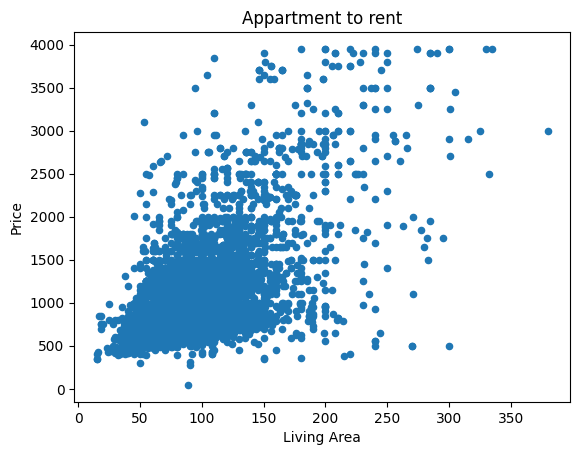

In [1645]:
#Plotting the correlation between Living Area and the price for renting appartment
df_rent_appart.plot(x='Living Area', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/1864639440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart.drop(df_rent_appart[(df_rent_appart['Number of rooms']>=5)].index, inplace=True) #deleting the extrem number of rooms after seeing the first plot


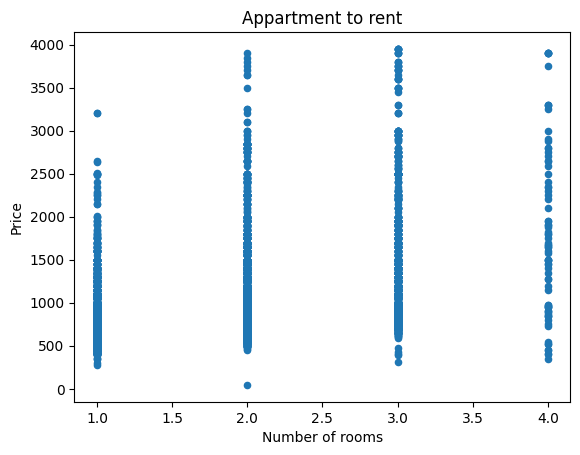

In [1646]:
#Plotting the correlation between number of rooms and the price for renting appartment
df_rent_appart.drop(df_rent_appart[(df_rent_appart['Number of rooms']>=5)].index, inplace=True) #deleting the extrem number of rooms after seeing the first plot
#df_sell_house.drop(df_sell_house[(df_sell_house['Price'] < 50000)].index, inplace=True) #Deleting the rows where the price are under 50 000 because some renting houses were true to sell so...
df_rent_appart.plot(x='Number of rooms', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

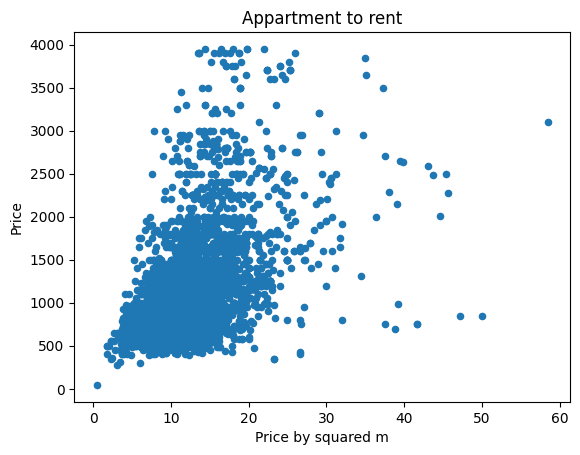

In [1647]:
#Plotting the correlation between price by squared m and the price for renting appartment
df_rent_appart.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

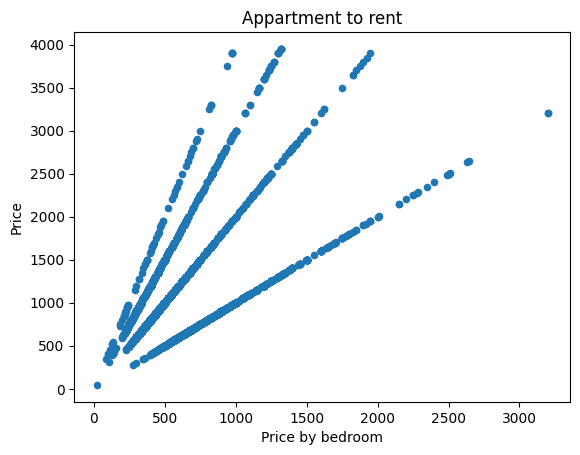

In [1648]:
#Plotting the correlation between price by bedroom and the price for renting appartment
df_rent_appart.plot(x='Price by bedroom', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

In [1649]:
#Renting houses

#Correlation between Price and Living Area for renting houses
col1, col2 = "Price", "Living Area"
corr = df_rent_house[col1].corr(df_rent_house[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

#Correlation between Price and Numbers of rooms for renting houses
col3 = "Number of rooms"
corr = df_rent_house[col1].corr(df_rent_house[col3])
print("Correlation between ", col1, " and ", col3, "is: ", round(corr, 2))

#Correlation between Price and Price by squared m for renting houses
col4 = "Price by squared m"
corr = df_rent_house[col1].corr(df_rent_house[col4])
print("Correlation between ", col1, " and ", col4, "is: ", round(corr, 2))

#Correlation between Price and Price by bedroom m for renting houses
col5 = "Price by bedroom"
corr = df_rent_house[col1].corr(df_rent_house[col5])
print("Correlation between ", col1, " and ", col5, "is: ", round(corr, 2))

Correlation between  Price  and  Living Area is:  0.56
Correlation between  Price  and  Number of rooms is:  0.53
Correlation between  Price  and  Price by squared m is:  0.56
Correlation between  Price  and  Price by bedroom is:  0.55


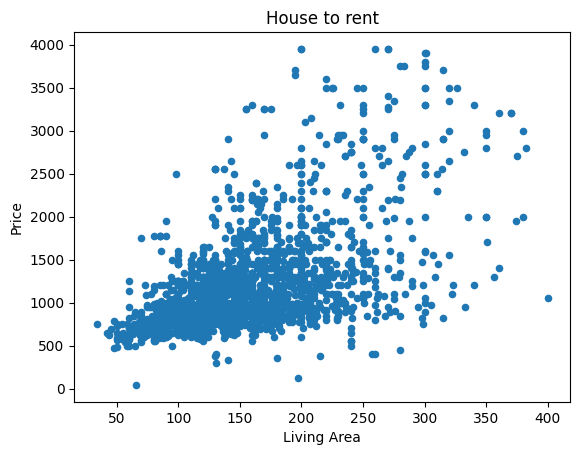

In [1650]:
#Plotting the correlation between Living Area and the Price for renting house
df_rent_house.plot(x='Living Area', y='Price', kind='scatter', title="House to rent")
plt.show()

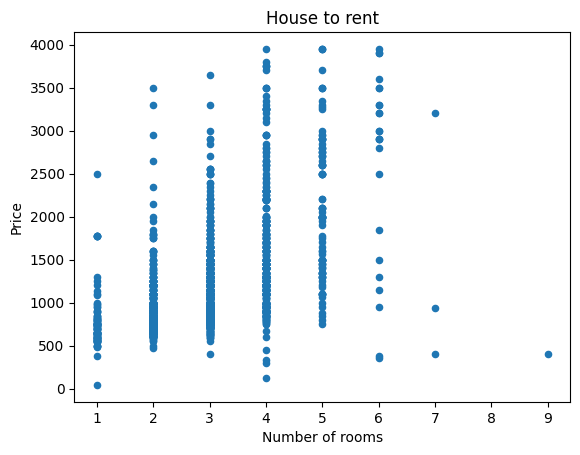

In [1651]:
#Plotting the correlation between Number of rooms and the Price for renting house

#df_rent_house.drop(df_rent_house[(df_rent_house['Number of rooms']>6)].index, inplace=True) #deleting the extrem number of rooms after seeing the first plot
df_rent_house.plot(x='Number of rooms', y='Price', kind='scatter', title="House to rent")
plt.show()

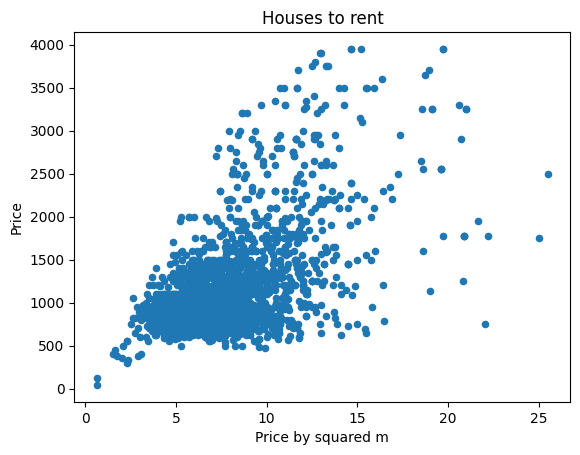

In [1652]:
#Plotting the correlation between price by squared m and the price for renting houses
df_rent_house.plot(x='Price by squared m', y='Price', kind='scatter', title="Houses to rent")
plt.show()

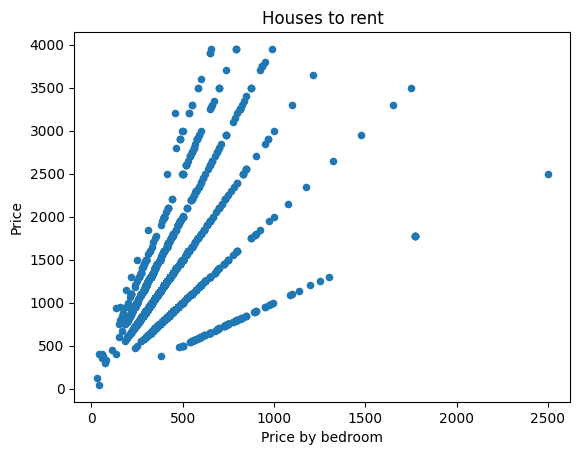

In [1653]:
#Plotting the correlation between price by bedroom and the price for renting houses
df_rent_house.plot(x='Price by bedroom', y='Price', kind='scatter', title="Houses to rent")
plt.show()

In [1654]:
#Selling appartements

#Correlation between Price and Living Area for selling appartments
col1, col2 = "Price", "Living Area"
corr = df_sell_appart[col1].corr(df_sell_appart[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

#Correlation between Price and Numbers of rooms for selling appartments
col3 = "Number of rooms"
corr = df_sell_appart[col1].corr(df_sell_appart[col3])
print("Correlation between ", col1, " and ", col3, "is: ", round(corr, 2))

#Correlation between Price and Price by squared m for selling appartments
col4 = "Price by squared m"
corr = df_sell_appart[col1].corr(df_sell_appart[col4])
print("Correlation between ", col1, " and ", col4, "is: ", round(corr, 2))

#Correlation between Price and Price by bedroom m for selling appartments
col5 = "Price by bedroom"
corr = df_sell_appart[col1].corr(df_sell_appart[col5])
print("Correlation between ", col1, " and ", col5, "is: ", round(corr, 2))

Correlation between  Price  and  Living Area is:  0.2
Correlation between  Price  and  Number of rooms is:  0.22
Correlation between  Price  and  Price by squared m is:  0.66
Correlation between  Price  and  Price by bedroom is:  0.63


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/850244242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart.drop(df_sell_appart[(df_sell_appart['Living Area']>10000)].index, inplace=True) #deleting the extrem living area after seeing the first plot


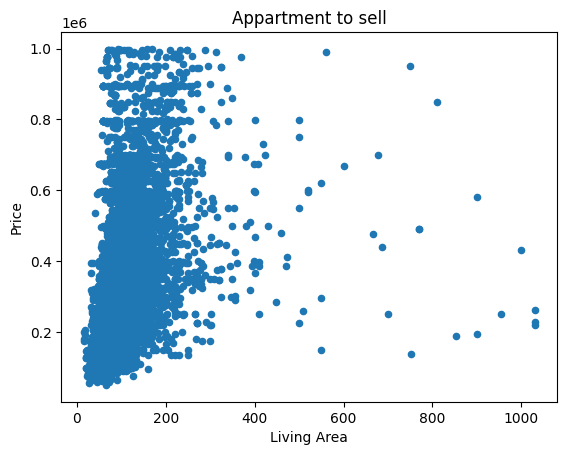

In [1655]:
#Plotting the correlation between Living Area and the Price for selling appartment
df_sell_appart.drop(df_sell_appart[(df_sell_appart['Living Area']>10000)].index, inplace=True) #deleting the extrem living area after seeing the first plot
df_sell_appart.plot(x='Living Area', y='Price', kind='scatter', title="Appartment to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/733026422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart.drop(df_sell_appart[(df_sell_appart['Number of rooms']>14)].index, inplace=True) #deleting the extrem number of rooms after seeing the first plot


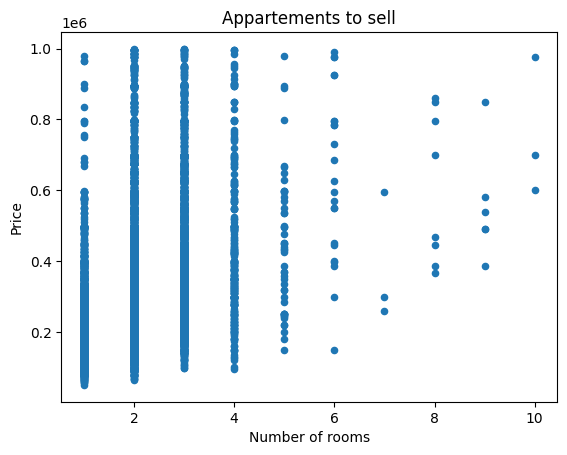

In [1656]:
#Plotting the correlation between Number of rooms and the Price for selling appartments
df_sell_appart.drop(df_sell_appart[(df_sell_appart['Number of rooms']>14)].index, inplace=True) #deleting the extrem number of rooms after seeing the first plot
df_sell_appart.plot(x='Number of rooms', y='Price', kind='scatter', title="Appartements to sell")
plt.show()

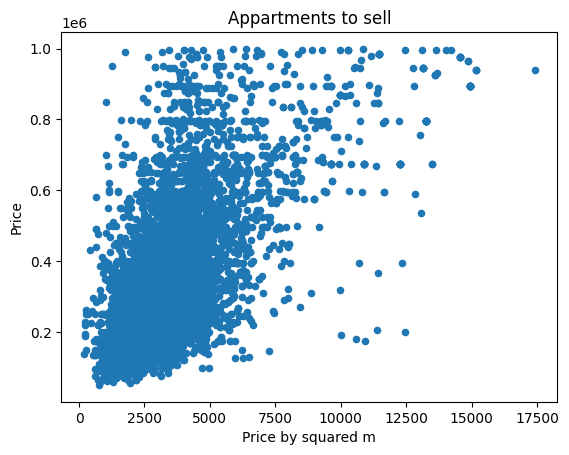

In [1657]:
#Plotting the correlation between price by squared m and the price for selling appartments
df_sell_appart.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartments to sell")
plt.show()

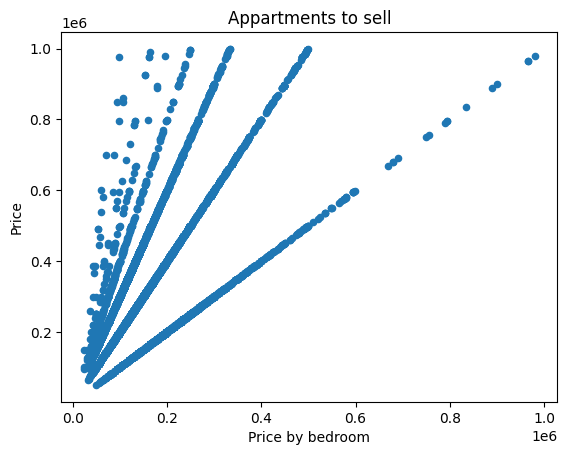

In [1658]:
#Plotting the correlation between price by bedroom and the price for selling appartments
df_sell_appart.plot(x='Price by bedroom', y='Price', kind='scatter', title="Appartments to sell")
plt.show()

In [1659]:
#Selling houses

#Correlation between Price and Living Area for selling houses
col1, col2 = "Price", "Living Area"
corr = df_sell_house[col1].corr(df_sell_house[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

#Correlation between Price and Numbers of rooms for selling houses
col3 = "Number of rooms"
corr = df_sell_house[col1].corr(df_sell_house[col3])
print("Correlation between ", col1, " and ", col3, "is: ", round(corr, 2))

#Correlation between Price and Price by squared m for selling houses
col4 = "Price by squared m"
corr = df_sell_house[col1].corr(df_sell_house[col4])
print("Correlation between ", col1, " and ", col4, "is: ", round(corr, 2))

#Correlation between Price and Price by bedroom m for selling houses
col5 = "Price by bedroom"
corr = df_sell_house[col1].corr(df_sell_house[col5])
print("Correlation between ", col1, " and ", col5, "is: ", round(corr, 2))

Correlation between  Price  and  Living Area is:  0.22
Correlation between  Price  and  Number of rooms is:  0.03
Correlation between  Price  and  Price by squared m is:  0.52
Correlation between  Price  and  Price by bedroom is:  0.72


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/791613506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Living Area']>5000)].index, inplace=True) #deleting the extrem Living Area after seeing the first plot


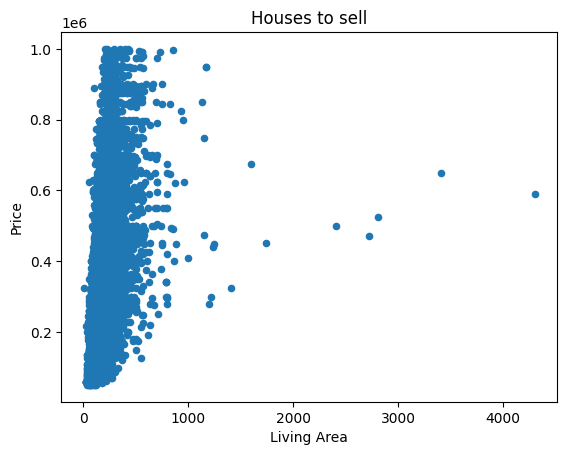

In [1660]:
#Plotting the correlation between Living Area and the Price for selling houses
df_sell_house.drop(df_sell_house[(df_sell_house['Living Area']>5000)].index, inplace=True) #deleting the extrem Living Area after seeing the first plot
df_sell_house.plot(x='Living Area', y='Price', kind='scatter', title="Houses to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/1535278355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Number of rooms']>20)].index, inplace=True) #deleting the extrem Number of rooms after seeing the first plot


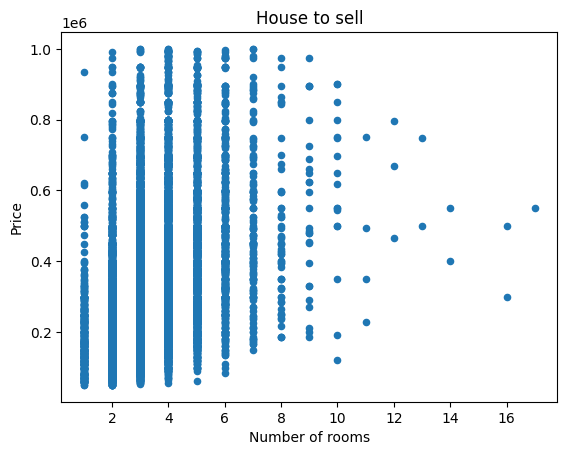

In [1661]:
#Plotting the correlation between Number of rooms and the Price for selling houses
df_sell_house.drop(df_sell_house[(df_sell_house['Number of rooms']>20)].index, inplace=True) #deleting the extrem Number of rooms after seeing the first plot
df_sell_house.plot(x='Number of rooms', y='Price', kind='scatter', title="House to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/3530751293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Price by squared m']>8000)].index, inplace=True) #deleting the extrem price by squared m after seeing the first plot


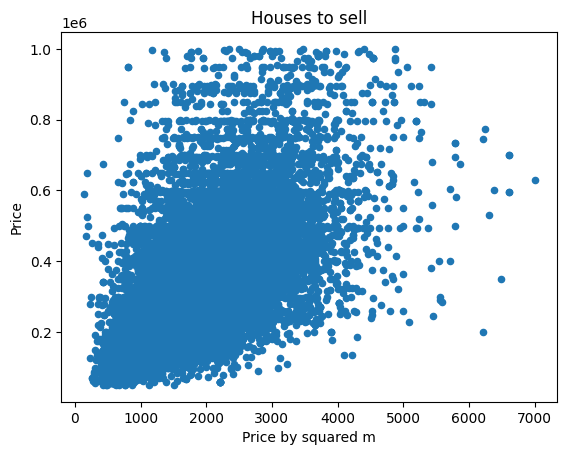

In [1662]:
#Plotting the correlation between price by squared m and the price for selling houses
df_sell_house.drop(df_sell_house[(df_sell_house['Price by squared m']>8000)].index, inplace=True) #deleting the extrem price by squared m after seeing the first plot
df_sell_house.plot(x='Price by squared m', y='Price', kind='scatter', title="Houses to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/1942197128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Price by bedroom']>600000)].index, inplace=True) #deleting the extrem Price by bedroom after seeing the first plot


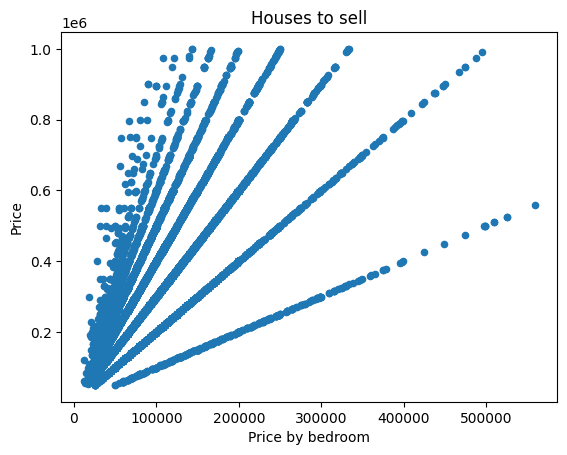

In [1663]:
#Plotting the correlation between price by bedroom and the price for renting appartment
df_sell_house.drop(df_sell_house[(df_sell_house['Price by bedroom']>600000)].index, inplace=True) #deleting the extrem Price by bedroom after seeing the first plot
df_sell_house.plot(x='Price by bedroom', y='Price', kind='scatter', title="Houses to sell")
plt.show()

In [1664]:
print(df_rent_appart['zipcode'].value_counts().head(50))

2000    296
1050    295
1000    283
9000    254
4000    189
1180    178
1200    140
2018    137
8300    131
5000    123
7000    100
1150     95
1040     93
8400     91
3000     90
1030     85
4020     84
1400     79
2600     79
7500     75
5100     72
4800     67
2800     62
9700     59
2100     56
6000     55
3500     55
1060     54
9600     53
8800     53
1160     50
8500     48
8000     48
2060     46
9100     45
1190     44
9300     43
2440     42
7700     39
1070     39
2200     38
2050     37
1140     36
4500     36
2650     35
5030     35
2610     34
1410     34
2500     34
1950     33
Name: zipcode, dtype: Int64


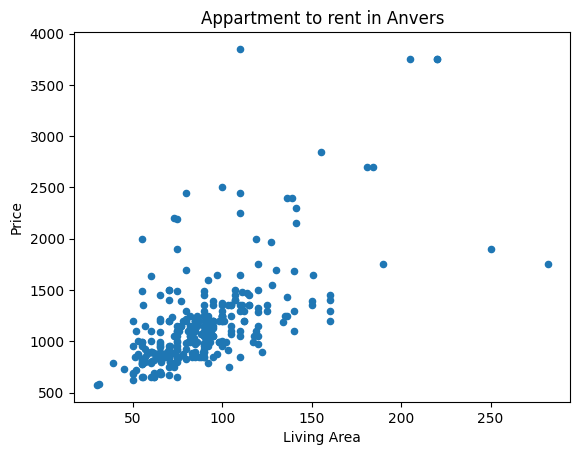

In [1665]:
#Taking only the zipcode 2000 from the df_rent_appart

df_rent_appart_zipcode_2000 = df_rent_appart[df_rent_appart['zipcode'] == 2000]

df_rent_appart_zipcode_2000

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 2000 (Anvers)
df_rent_appart_zipcode_2000.plot(x='Living Area', y='Price', kind='scatter', title="Appartment to rent in Anvers")
plt.show()

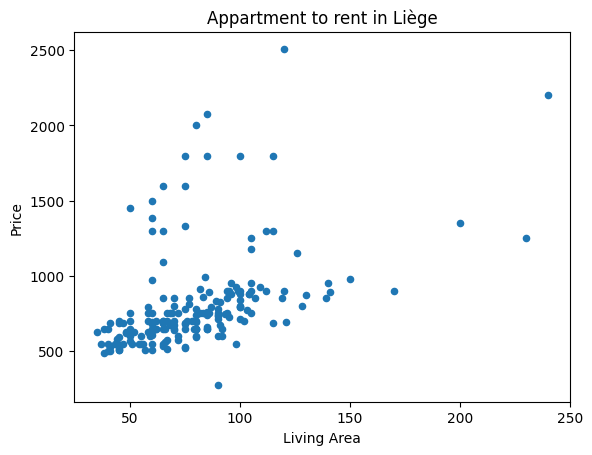

In [1666]:
#Taking only the zipcode 400 from the df_rent_appart

df_rent_appart_zipcode_4000 = df_rent_appart[df_rent_appart['zipcode'] == 4000]

df_rent_appart_zipcode_4000

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 2000 (Liège)
df_rent_appart_zipcode_4000.plot(x='Living Area', y='Price', kind='scatter', title="Appartment to rent in Liège")
plt.show()

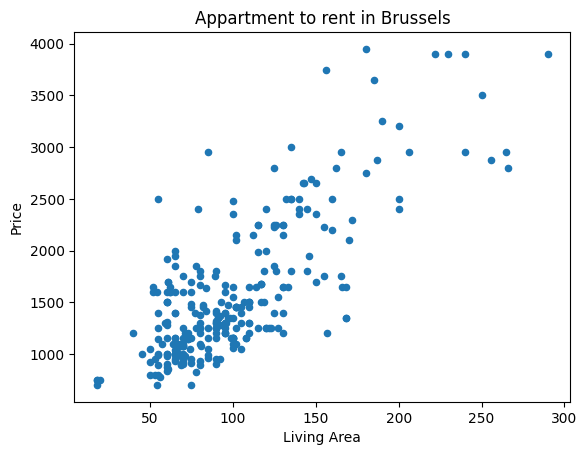

In [1667]:
#Taking only the zipcode 1000 from the df_rent_appart

df_rent_appart_zipcode_1000 = df_rent_appart[df_rent_appart['zipcode'] == 1000]

df_rent_appart_zipcode_1000

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_rent_appart_zipcode_1000.plot(x='Living Area', y='Price', kind='scatter', title="Appartment to rent in Brussels")
plt.show()

The minimal renting price by squared m in Brussels Province is 6.891891891891892 €/m2
The maximal renting price by squared m in Brussels Province is 45.45454545454545 €/m2
The mean renting price by squared m in Brussels Province is 15.053195818082461 €/m2


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/3165598106.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df_rent_appart["zipcode"].between(1000, 1299, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/3165598106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart_bru.drop(df_rent_appart_bru[(df_rent_appart_bru['Price by squared m'] < 5)].index, inplace=True)


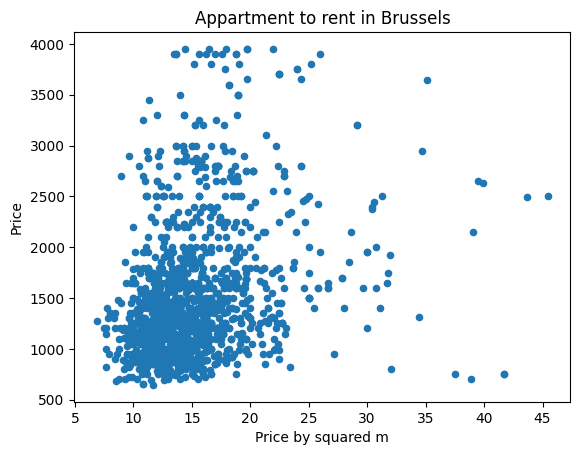

In [1668]:
# making a bool series
bool_series = df_rent_appart["zipcode"].between(1000, 1299, inclusive = True)
  
# returning dataframe with salary between above values
df_rent_appart_bru = df_rent_appart[bool_series]

#deleting the extrem Price by squared m because they are colocation
df_rent_appart_bru.drop(df_rent_appart_bru[(df_rent_appart_bru['Price by squared m'] < 5)].index, inplace=True) 

bru_min = df_rent_appart_bru['Price by squared m'].min()
bru_max = df_rent_appart_bru['Price by squared m'].max()
bru_mean = df_rent_appart_bru['Price by squared m'].mean()

print(f"The minimal renting price by squared m in Brussels Province is {bru_min} €/m2")
print(f"The maximal renting price by squared m in Brussels Province is {bru_max} €/m2")
print(f"The mean renting price by squared m in Brussels Province is {bru_mean} €/m2")

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_rent_appart_bru.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Brussels")
plt.show()

#print(df_rent_appart_brussels_province['zipcode'].value_counts())
#df_rent_appart_brussels_province.groupby('Price')['Living Area'].mean()
#print(df_rent_appart_brussels_province['Price'].value_counts().head(50))





In [1669]:
#defining the function to extract a range of zipcode given to this function from one defined dataframe with a give column 
#name (where the zipcode are)

def taking_zip_code_desired_from_df (begin_zipcode, end_zipcode, df, name_of_col_zipcode):

    # making a bool series
    bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
    
    # returning dataframe with salary between above values
    df_desired= df[bool_series]

    return df_desired


In [1670]:
#defining the function to calcul the min, max, mean for one province to rent or to buy

def min_max_mean_df (df, colum_name, province_name, rent = True):  

    min = df[colum_name].min().round(2)
    max = df[colum_name].max().round(2)
    mean = df[colum_name].mean().round(2)

    diction = {province_name : mean}

    if rent == True :
        selling_or_renting = "renting"
    else :
        selling_or_renting = "selling"

    print(f"The minimal {selling_or_renting} {colum_name} in {province_name} Province is {min.round(2)} €/m2")
    print(f"The maximal {selling_or_renting} {colum_name} in {province_name} Province is {max.round(2)} €/m2")
    print(f"The mean {selling_or_renting} {colum_name} in {province_name} Province is {mean.round(2)} €/m2")

    return diction



The minimal renting Price by squared m in Brussels Province is 2.81 €/m2
The maximal renting Price by squared m in Brussels Province is 45.45 €/m2
The mean renting Price by squared m in Brussels Province is 15.04 €/m2


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


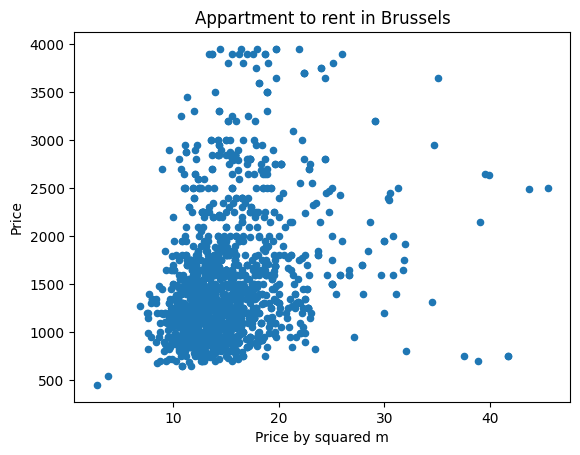

In [1671]:
#Brussels
df_rent_appart_bru = taking_zip_code_desired_from_df(1000, 1299, df_rent_appart ,"zipcode")
mean_bru = min_max_mean_df(df_rent_appart_bru ,"Price by squared m", "Brussels")
mean = {}
mean.update(mean_bru)

#Plotting the correlation between Living Area and the price for renting appartment in Brussels province
df_rent_appart_bru.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Brussels")
plt.show()



/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Brabant wallon Province is 2.08 €/m2
The maximal renting Price by squared m in Brabant wallon Province is 45.62 €/m2
The mean renting Price by squared m in Brabant wallon Province is 11.29 €/m2


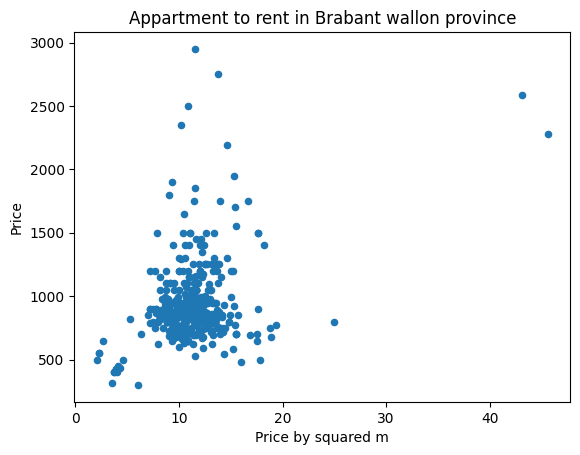

In [1672]:
#BW
df_rent_appart_bw = taking_zip_code_desired_from_df(1300, 1499, df_rent_appart ,"zipcode")
mean_bw = min_max_mean_df(df_rent_appart_bw ,"Price by squared m", "Brabant wallon")

mean.update(mean_bw)

#Plotting the correlation between Living Area and the price for renting appartment in Brabant wallon province
df_rent_appart_bw.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Brabant wallon province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


There are 669 rows in our database named df_rent_appart_bf_final
There are 15 columns in our database named df_rent_appart_bf_final
The minimal renting Price by squared m in Brabant flamand Province is 4.81 €/m2
The maximal renting Price by squared m in Brabant flamand Province is 50.0 €/m2
The mean renting Price by squared m in Brabant flamand Province is 11.28 €/m2


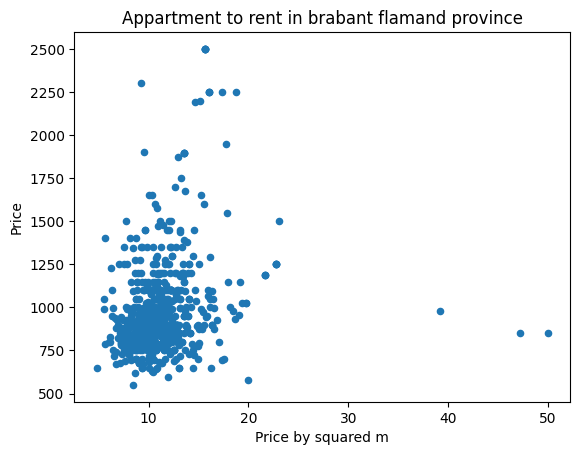

In [1673]:
#Brabant flamand
df_rent_appart_bf = taking_zip_code_desired_from_df(1500, 1999, df_rent_appart ,"zipcode")
df_rent_appart_bf2 = taking_zip_code_desired_from_df(3000, 3499, df_rent_appart ,"zipcode")
df_rent_appart_bf_final = pd.concat([df_rent_appart_bf, df_rent_appart_bf2], axis = 0)
how_many_columns_rows_df(df_rent_appart_bf_final)
mean_bf = min_max_mean_df(df_rent_appart_bf_final ,"Price by squared m", "Brabant flamand")
mean.update(mean_bf)

#Plotting the correlation between Living Area and the price for renting appartment in brabant flamand province
df_rent_appart_bf_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in brabant flamand province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Anvers Province is 2.75 €/m2
The maximal renting Price by squared m in Anvers Province is 36.36 €/m2
The mean renting Price by squared m in Anvers Province is 10.94 €/m2


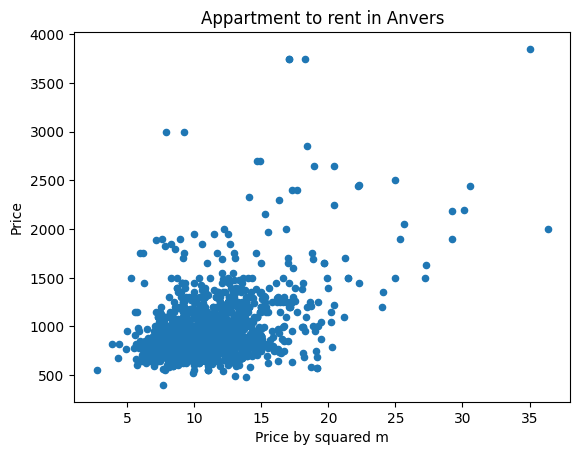

In [1674]:
#Anvers
df_rent_appart_anv = taking_zip_code_desired_from_df(2000, 2999, df_rent_appart ,"zipcode")
mean_anv = min_max_mean_df(df_rent_appart_anv ,"Price by squared m", "Anvers")
mean.update(mean_anv)

#Plotting the correlation between Living Area and the price for renting appartment in Anvers province
df_rent_appart_anv.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Anvers")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Limbourg Province is 3.69 €/m2
The maximal renting Price by squared m in Limbourg Province is 23.21 €/m2
The mean renting Price by squared m in Limbourg Province is 8.93 €/m2


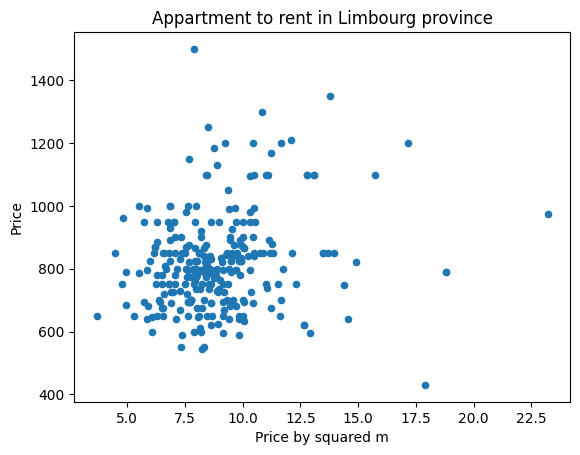

In [1675]:
#Limbourg
df_rent_appart_lim = taking_zip_code_desired_from_df(3500, 3999, df_rent_appart ,"zipcode")
mean_lim = min_max_mean_df(df_rent_appart_lim ,"Price by squared m", "Limbourg")
mean.update(mean_lim)

#Plotting the correlation between Living Area and the price for renting appartment in Limbourg province
df_rent_appart_lim.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Limbourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Liege Province is 2.33 €/m2
The maximal renting Price by squared m in Liege Province is 28.98 €/m2
The mean renting Price by squared m in Liege Province is 9.45 €/m2


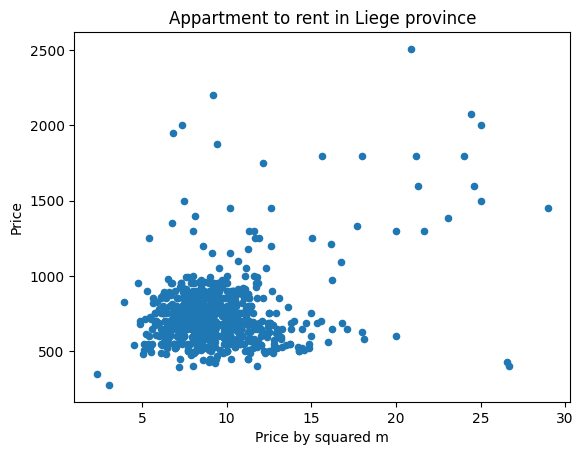

In [1676]:
#Liège
df_rent_appart_liege = taking_zip_code_desired_from_df(4000, 4999, df_rent_appart ,"zipcode")
mean_liege = min_max_mean_df(df_rent_appart_liege ,"Price by squared m", "Liege")
mean.update(mean_liege)

#Plotting the correlation between Living Area and the price for renting appartment in Liege province
df_rent_appart_liege.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Liege province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Namur Province is 2.4 €/m2
The maximal renting Price by squared m in Namur Province is 18.75 €/m2
The mean renting Price by squared m in Namur Province is 9.89 €/m2


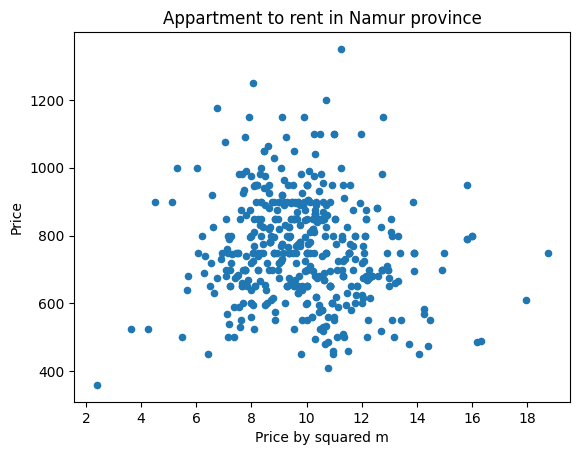

In [1677]:
#Namur
df_rent_appart_nam = taking_zip_code_desired_from_df(5000, 5680, df_rent_appart ,"zipcode")
mean_nam = min_max_mean_df(df_rent_appart_nam ,"Price by squared m", "Namur")
mean.update(mean_nam)

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_rent_appart_nam.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Namur province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Hainaut Province is 1.82 €/m2
The maximal renting Price by squared m in Hainaut Province is 23.33 €/m2
The mean renting Price by squared m in Hainaut Province is 9.11 €/m2


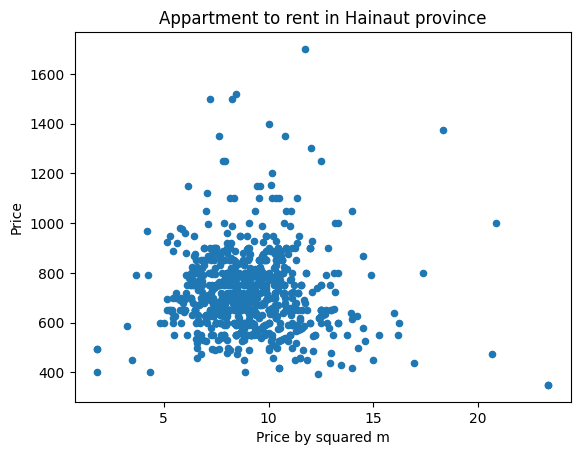

In [1678]:
#Hainaut
df_rent_appart_hai = taking_zip_code_desired_from_df(6000, 6599, df_rent_appart ,"zipcode")
df_rent_appart_hai2 = taking_zip_code_desired_from_df(7000, 7999, df_rent_appart ,"zipcode")
df_rent_appart_hai_final = pd.concat([df_rent_appart_hai, df_rent_appart_hai2], axis = 0)

mean_hai = min_max_mean_df(df_rent_appart_hai_final ,"Price by squared m", "Hainaut")
mean.update(mean_hai)

#Plotting the correlation between Living Area and the price for renting appartment in Hainaut province
df_rent_appart_hai_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Hainaut province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Luxembourg Province is 3.83 €/m2
The maximal renting Price by squared m in Luxembourg Province is 17.5 €/m2
The mean renting Price by squared m in Luxembourg Province is 9.61 €/m2


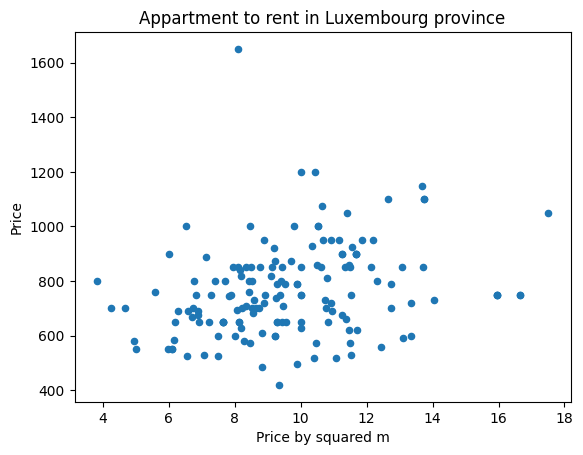

In [1679]:
#Luxembourg
df_rent_appart_lux = taking_zip_code_desired_from_df(6600, 6999, df_rent_appart ,"zipcode")
mean_lux = min_max_mean_df(df_rent_appart_lux ,"Price by squared m", "Luxembourg")
mean.update(mean_lux)

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_rent_appart_lux.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Luxembourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Luxembourg Province is 3.83 €/m2
The maximal renting Price by squared m in Luxembourg Province is 17.5 €/m2
The mean renting Price by squared m in Luxembourg Province is 9.61 €/m2


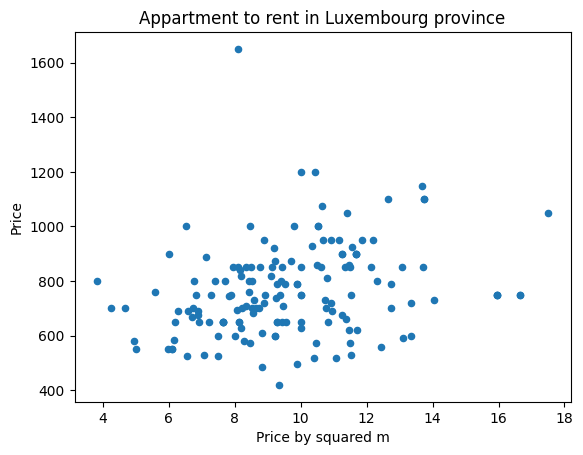

In [1680]:
#Luxembourg
df_sell_appart_lux = taking_zip_code_desired_from_df(6600, 6999, df_rent_appart ,"zipcode")
mean_sell_lux = min_max_mean_df(df_rent_appart_lux ,"Price by squared m", "Luxembourg")
mean.update(mean_lux)

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_rent_appart_lux.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Luxembourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/4197895106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart_fl_occi.drop(df_rent_appart_fl_occi[(df_rent_appart_fl_occi['Price by squared m'] < 1)].index, inplace=True) #Deleting the row where the price by squared m is under 1 because the Price was 45 a month for the appartment there is a mistake I think...


The minimal renting Price by squared m in Flandre occidentale Province is 3.12 €/m2
The maximal renting Price by squared m in Flandre occidentale Province is 44.67 €/m2
The mean renting Price by squared m in Flandre occidentale Province is 10.06 €/m2


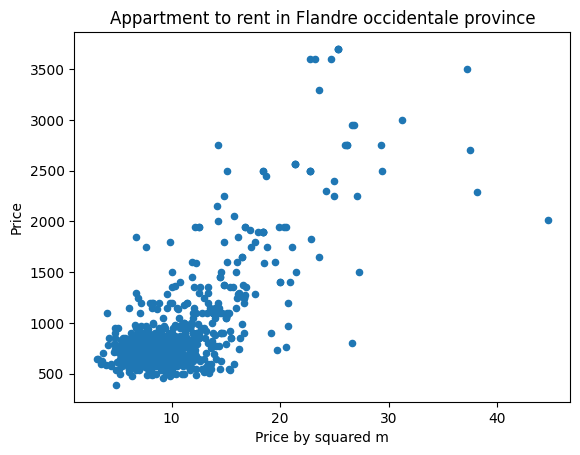

In [1681]:
#Flandre occidentale
df_rent_appart_fl_occi = taking_zip_code_desired_from_df(8000, 8999, df_rent_appart ,"zipcode")
#print(df_rent_appart_fl_occi[df_rent_appart_fl_occi['Price by squared m'] < 1].head(20))
df_rent_appart_fl_occi.drop(df_rent_appart_fl_occi[(df_rent_appart_fl_occi['Price by squared m'] < 1)].index, inplace=True) #Deleting the row where the price by squared m is under 1 because the Price was 45 a month for the appartment there is a mistake I think...

mean_fl_occi = min_max_mean_df(df_rent_appart_fl_occi ,"Price by squared m", "Flandre occidentale")
mean.update(mean_fl_occi)

#Plotting the correlation between Living Area and the price for renting appartment in Flandre occidentale province
df_rent_appart_fl_occi.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Flandre occidentale province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Flandre orientale Province is 3.82 €/m2
The maximal renting Price by squared m in Flandre orientale Province is 58.49 €/m2
The mean renting Price by squared m in Flandre orientale Province is 9.33 €/m2


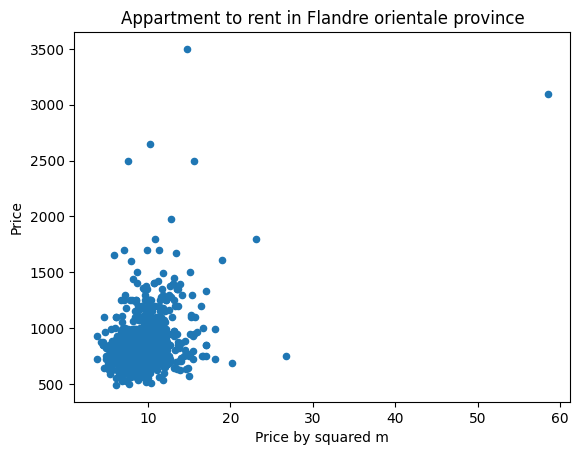

In [1682]:
#Flandre orientale
df_rent_appart_fl_ori = taking_zip_code_desired_from_df(9000, 9999, df_rent_appart ,"zipcode")
mean_fl_ori = min_max_mean_df(df_rent_appart_fl_ori ,"Price by squared m", "Flandre orientale")
mean.update(mean_fl_ori)

#print(df_rent_appart_fl_ori[df_rent_appart_fl_ori["Price by squared m"] > 50].head(2))
#print(df_rent_appart_fl_ori[df_rent_appart_fl_ori["Price"] > 3000].head(2))

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_rent_appart_fl_ori.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Flandre orientale province")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

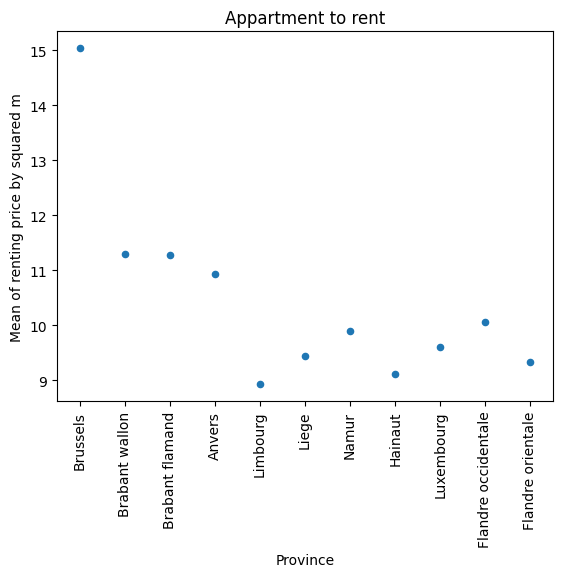

In [1683]:
#df_rent_province_to_plot = pd.DataFrame.from_dict(mean, orient="index", columns=["Province","Mean of renting price by squared m"])

df_rent_province_to_plot = pd.DataFrame.from_dict(mean, orient="index").reset_index()
df_rent_province_to_plot.rename(columns={'index':'Province', 0:'Mean of renting price by squared m'}, inplace=True) 

df_rent_province_to_plot.plot(x="Province", y='Mean of renting price by squared m', kind='scatter', title="Appartment to rent")
plt.xticks(rotation=90)
plt.show


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Brussels Province is 1353.79 €/m2
The maximal selling Price by squared m in Brussels Province is 7523.08 €/m2
The mean selling Price by squared m in Brussels Province is 3663.24 €/m2


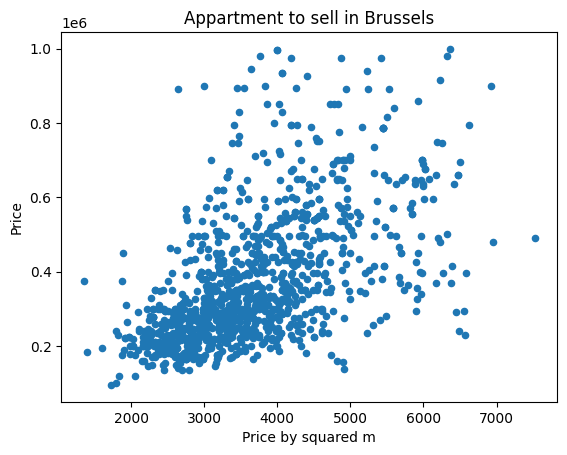

In [1684]:
#Preparing the data to plot with the sell_df

#Brussels
df_sell_appart_bru = taking_zip_code_desired_from_df(1000, 1299, df_sell_appart ,"zipcode")
mean_sell_bru = min_max_mean_df(df_sell_appart_bru ,"Price by squared m", "Brussels", rent=False)
mean_sell = {}
mean_sell.update(mean_sell_bru)

#Plotting the correlation between Living Area and the price for renting appartment in Brussels province
df_sell_appart_bru.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Brussels")
plt.show()

The minimal selling Price by squared m in Brabant wallon Province is 183.51 €/m2
The maximal selling Price by squared m in Brabant wallon Province is 6046.51 €/m2
The mean selling Price by squared m in Brabant wallon Province is 3194.08 €/m2


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/2124886978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart_bw.drop(df_sell_appart_bw[(df_sell_appart_bw['Price by squared m']<500)].index, inplace=True)


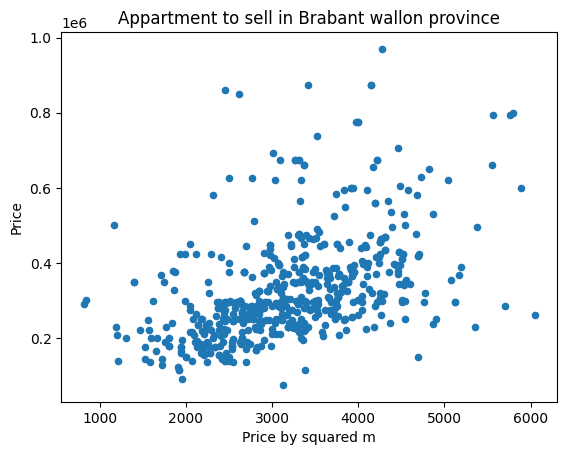

In [1685]:
#BW
df_sell_appart_bw = taking_zip_code_desired_from_df(1300, 1499, df_sell_appart ,"zipcode")
mean_sell_bw = min_max_mean_df(df_sell_appart_bw ,"Price by squared m", "Brabant wallon", rent=False)

mean_sell.update(mean_sell_bw)

df_sell_appart_bw.drop(df_sell_appart_bw[(df_sell_appart_bw['Price by squared m']<500)].index, inplace=True)

#Plotting the correlation between Living Area and the price for renting appartment in Brabant wallon province
df_sell_appart_bw.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Brabant wallon province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


There are 1132 rows in our database named df_sell_appart_bf_final
There are 15 columns in our database named df_sell_appart_bf_final
The minimal selling Price by squared m in Brabant flamand Province is 595.24 €/m2
The maximal selling Price by squared m in Brabant flamand Province is 12437.5 €/m2
The mean selling Price by squared m in Brabant flamand Province is 3341.49 €/m2


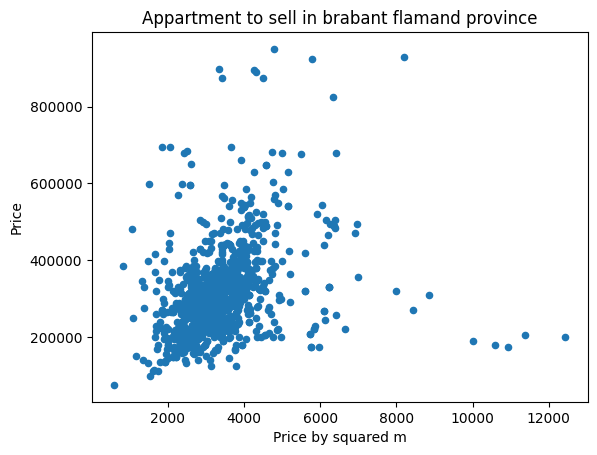

In [1686]:
#Brabant flamand
df_sell_appart_bf = taking_zip_code_desired_from_df(1500, 1999, df_sell_appart ,"zipcode")
df_sell_appart_bf2 = taking_zip_code_desired_from_df(3000, 3499, df_sell_appart ,"zipcode")
df_sell_appart_bf_final = pd.concat([df_sell_appart_bf, df_sell_appart_bf2], axis = 0)
how_many_columns_rows_df(df_sell_appart_bf_final)
mean_sell_bf = min_max_mean_df(df_sell_appart_bf_final ,"Price by squared m", "Brabant flamand", rent=False)
mean_sell.update(mean_sell_bf)

#Plotting the correlation between Living Area and the price for renting appartment in brabant flamand province
df_sell_appart_bf_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in brabant flamand province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/901802772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart_anv.drop(df_sell_appart_anv[(df_sell_appart_anv['Price by squared m']<500)].index, inplace=True)


The minimal selling Price by squared m in Anvers Province is 221.83 €/m2
The maximal selling Price by squared m in Anvers Province is 10710.14 €/m2
The mean selling Price by squared m in Anvers Province is 3028.03 €/m2


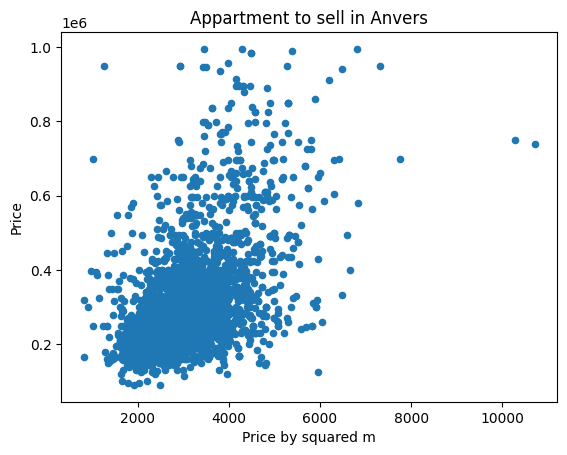

In [1687]:
#Anvers
df_sell_appart_anv = taking_zip_code_desired_from_df(2000, 2999, df_sell_appart ,"zipcode")
mean_sell_anv = min_max_mean_df(df_sell_appart_anv ,"Price by squared m", "Anvers", rent=False)
mean_sell.update(mean_sell_anv)
df_sell_appart_anv.drop(df_sell_appart_anv[(df_sell_appart_anv['Price by squared m']<500)].index, inplace=True)

#Plotting the correlation between Living Area and the price for renting appartment in Anvers province
df_sell_appart_anv.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Anvers")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Limbourg Province is 824.92 €/m2
The maximal selling Price by squared m in Limbourg Province is 7045.45 €/m2
The mean selling Price by squared m in Limbourg Province is 2728.52 €/m2


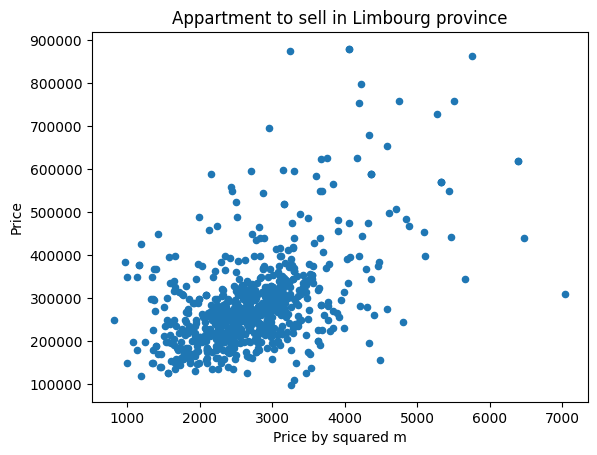

In [1688]:
#Limbourg
df_sell_appart_lim = taking_zip_code_desired_from_df(3500, 3999, df_sell_appart ,"zipcode")
mean_sell_lim = min_max_mean_df(df_sell_appart_lim ,"Price by squared m", "Limbourg", rent=False)
mean_sell.update(mean_sell_lim)

#Plotting the correlation between Living Area and the price for renting appartment in Limbourg province
df_sell_appart_lim.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Limbourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Liege Province is 261.52 €/m2
The maximal selling Price by squared m in Liege Province is 9727.27 €/m2
The mean selling Price by squared m in Liege Province is 2468.96 €/m2


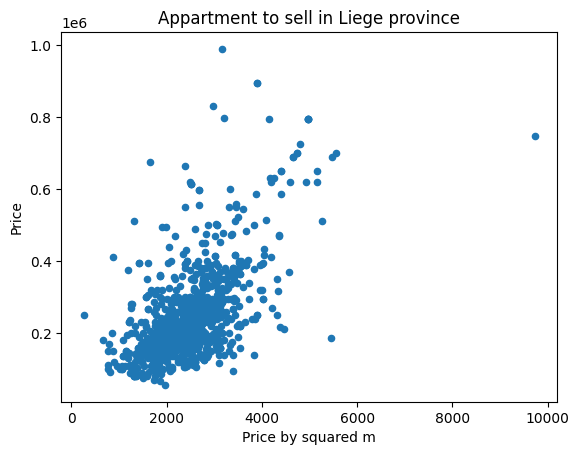

In [1689]:
#Liège
df_sell_appart_liege = taking_zip_code_desired_from_df(4000, 4999, df_sell_appart ,"zipcode")
mean_sell_liege = min_max_mean_df(df_sell_appart_liege ,"Price by squared m", "Liege", rent=False)
mean_sell.update(mean_sell_liege)



#Plotting the correlation between Living Area and the price for renting appartment in Liege province
df_sell_appart_liege.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Liege province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/2600011644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart_nam.drop(df_sell_appart_nam[(df_sell_appart_nam['Price by squared m']<500)].index, inplace=True)


The minimal selling Price by squared m in Namur Province is 357.14 €/m2
The maximal selling Price by squared m in Namur Province is 5921.05 €/m2
The mean selling Price by squared m in Namur Province is 2510.49 €/m2


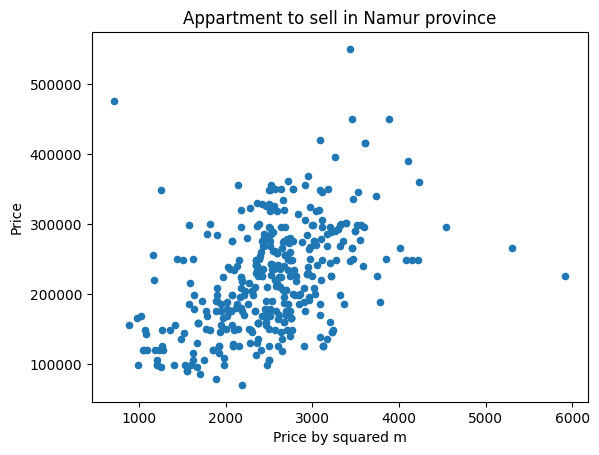

In [1690]:
#Namur
df_sell_appart_nam = taking_zip_code_desired_from_df(5000, 5680, df_sell_appart ,"zipcode")
mean_sell_nam = min_max_mean_df(df_sell_appart_nam ,"Price by squared m", "Namur", rent=False)
mean_sell.update(mean_sell_nam)

df_sell_appart_nam.drop(df_sell_appart_nam[(df_sell_appart_nam['Price by squared m']<500)].index, inplace=True)

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_sell_appart_nam.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Namur province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Hainaut Province is 430.0 €/m2
The maximal selling Price by squared m in Hainaut Province is 5322.63 €/m2
The mean selling Price by squared m in Hainaut Province is 1987.05 €/m2


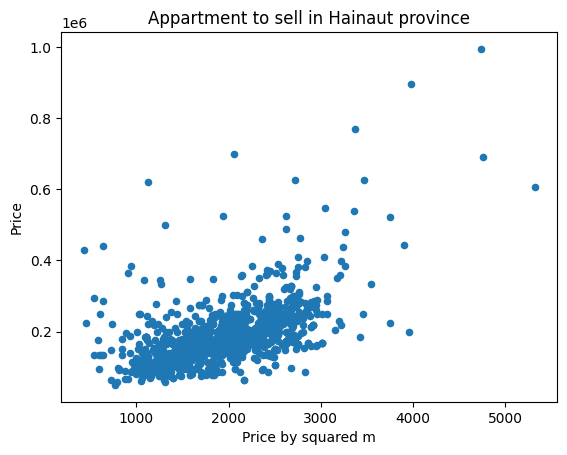

In [1691]:
#Hainaut
df_sell_appart_hai = taking_zip_code_desired_from_df(6000, 6599, df_sell_appart ,"zipcode")
df_sell_appart_hai2 = taking_zip_code_desired_from_df(7000, 7999, df_sell_appart ,"zipcode")
df_sell_appart_hai_final = pd.concat([df_sell_appart_hai, df_sell_appart_hai2], axis = 0)

mean_sell_hai = min_max_mean_df(df_sell_appart_hai_final ,"Price by squared m", "Hainaut", rent=False)
mean_sell.update(mean_sell_hai)

#Plotting the correlation between Living Area and the price for renting appartment in Hainaut province
df_sell_appart_hai_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Hainaut province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Luxembourg Province is 270.91 €/m2
The maximal renting Price by squared m in Luxembourg Province is 4551.28 €/m2
The mean renting Price by squared m in Luxembourg Province is 2558.86 €/m2


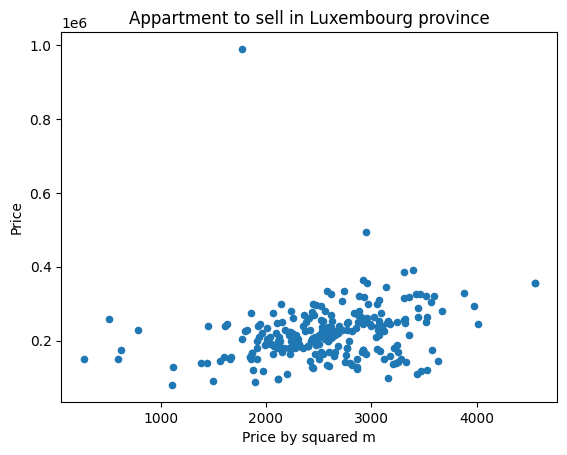

In [1692]:
#Luxembourg
df_sell_appart_lux = taking_zip_code_desired_from_df(6600, 6999, df_sell_appart ,"zipcode")
mean_sell_lux = min_max_mean_df(df_sell_appart_lux ,"Price by squared m", "Luxembourg")
mean_sell.update(mean_sell_lux)

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_sell_appart_lux.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Luxembourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Flandre occidentale Province is 214.08 €/m2
The maximal selling Price by squared m in Flandre occidentale Province is 17407.41 €/m2
The mean selling Price by squared m in Flandre occidentale Province is 3965.69 €/m2


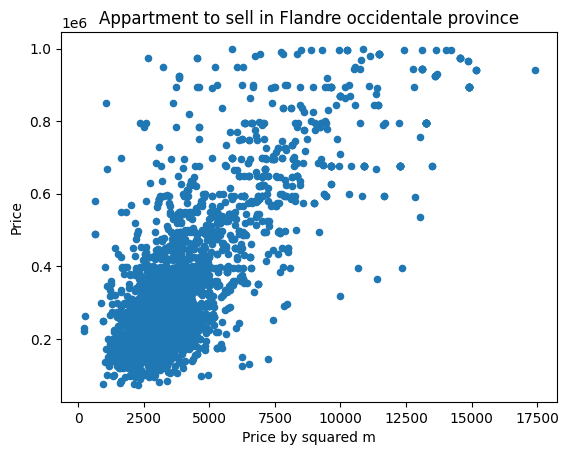

In [1693]:
#Flandre occidentale
df_sell_appart_fl_occi = taking_zip_code_desired_from_df(8000, 8999, df_sell_appart ,"zipcode")

mean_sell_fl_occi = min_max_mean_df(df_sell_appart_fl_occi ,"Price by squared m", "Flandre occidentale", rent=False)
mean_sell.update(mean_sell_fl_occi)

#Plotting the correlation between Living Area and the price for renting appartment in Flandre occidentale province
df_sell_appart_fl_occi.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Flandre occidentale province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/606855554.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Flandre orientale Province is 216.67 €/m2
The maximal selling Price by squared m in Flandre orientale Province is 7956.75 €/m2
The mean selling Price by squared m in Flandre orientale Province is 3080.73 €/m2


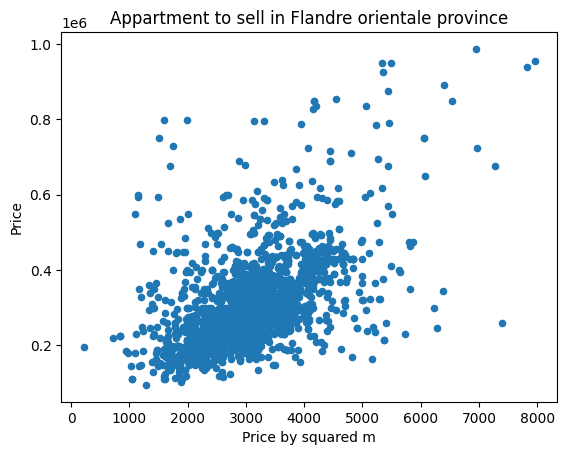

In [1694]:
#Flandre orientale
df_sell_appart_fl_ori = taking_zip_code_desired_from_df(9000, 9999, df_sell_appart ,"zipcode")
mean_sell_fl_ori = min_max_mean_df(df_sell_appart_fl_ori ,"Price by squared m", "Flandre orientale", rent=False)
mean_sell.update(mean_sell_fl_ori)

#print(df_rent_appart_fl_ori[df_rent_appart_fl_ori["Price by squared m"] > 50].head(2))
#print(df_sell_appart_fl_ori[df_sell_appart_fl_ori["Price by squared m"] < 500])

#Plotting the correlation between Living Area and the price for renting appartment in zipcode 1000 (Brussels)
df_sell_appart_fl_ori.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Flandre orientale province")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

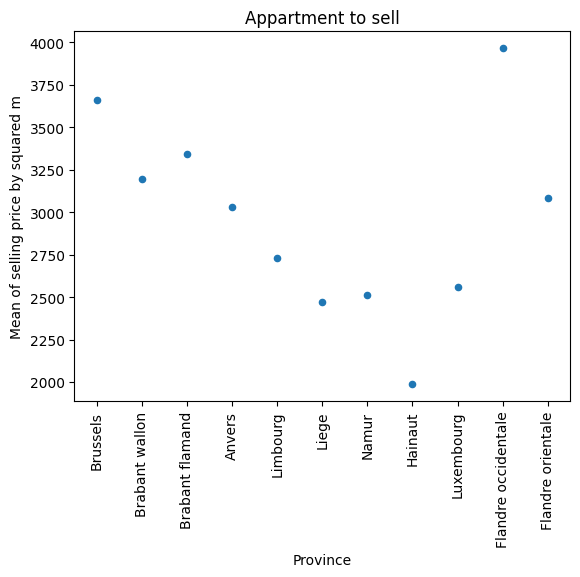

In [1695]:
#df_rent_province_to_plot = pd.DataFrame.from_dict(mean, orient="index", columns=["Province","Mean of renting price by squared m"])

df_sell_province_to_plot = pd.DataFrame.from_dict(mean_sell, orient="index").reset_index()
df_sell_province_to_plot.rename(columns={'index':'Province', 0:'Mean of selling price by squared m'}, inplace=True) 

df_sell_province_to_plot.plot(x="Province", y='Mean of selling price by squared m', kind='scatter', title="Appartment to sell")
plt.xticks(rotation=90)
plt.show

In [1696]:
#The 10 most expensive municipalities where to rent a appartment by renting price
df_test = df_rent_appart.groupby('zipcode')['Price'].max()
df_test.sort_values(ascending=False).head(10)


zipcode
1000    3950.0
1050    3950.0
1180    3900.0
2000    3850.0
8300    3700.0
1040    3650.0
1160    3648.0
9000    3500.0
1200    3300.0
1150    3300.0
Name: Price, dtype: float64

In [1711]:
#TOP 10 of the most expensive municipalities by mean renting price for one appartment in Belgium
mean_price = df_rent_appart.groupby('zipcode')['Price'].mean().round(2)
top_10_mean = mean_price.sort_values(ascending=False).head(10)
print(top_10_mean)


zipcode
1933    1983.50
1050    1835.79
1150    1737.32
8300    1695.91
1180    1637.29
1060    1584.91
1000    1573.05
1040    1543.58
1160    1495.02
9080    1487.50
Name: Price, dtype: float64


In [1707]:
#TOP 10 of the most expensive municipalities by median price for one appartment in Belgium
top_10_median = df_rent_appart.groupby('zipcode')['Price'].median().sort_values(ascending=False).head(10)
print(top_10_median)

zipcode
1933    2072.5
1050    1650.0
1081    1650.0
1150    1550.0
1060    1515.0
9080    1487.5
8300    1450.0
3078    1400.0
1380    1400.0
1180    1400.0
Name: Price, dtype: float64


In [1708]:
#TOP 10 of the most expensive municipalities by squared m price for one appartment in Belgium
top_10_squared = df_rent_appart.groupby('zipcode')['Price by squared m'].max().round(2).sort_values(ascending=False).head(10)
print(top_10_squared)


zipcode
9000    58.49
3000    50.00
1348    45.62
1000    45.45
8000    44.67
1160    43.67
1040    39.07
8300    38.12
2000    36.36
1180    34.47
Name: Price by squared m, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

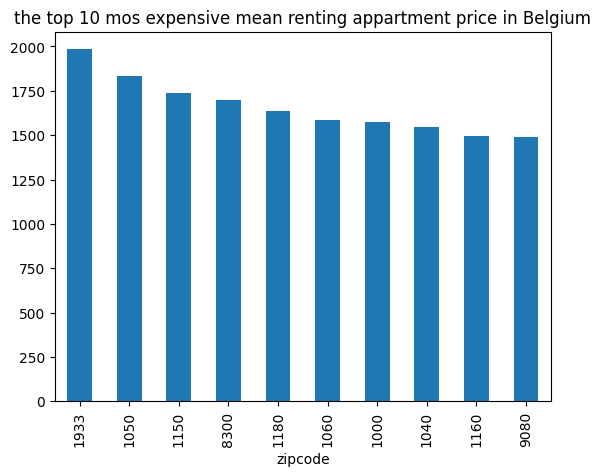

In [1713]:
top_10_mean_price.plot(x="zipcode", y='Mean price', kind='bar', title="the top 10 mos expensive mean renting appartment price in Belgium")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

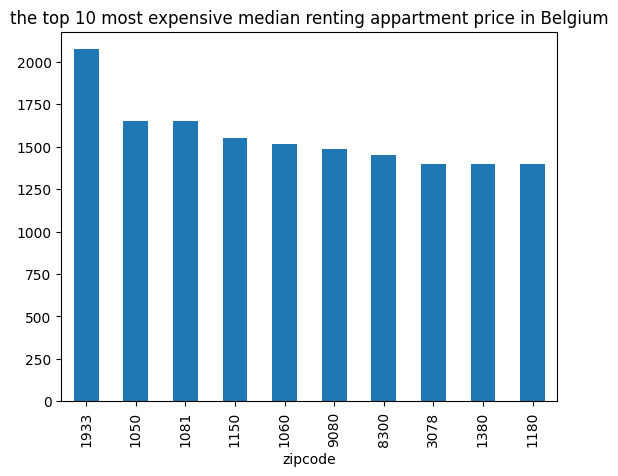

In [1714]:
top_10_median.plot(x="zipcode", y='Median price', kind='bar', title="the top 10 most expensive median renting appartment price in Belgium")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

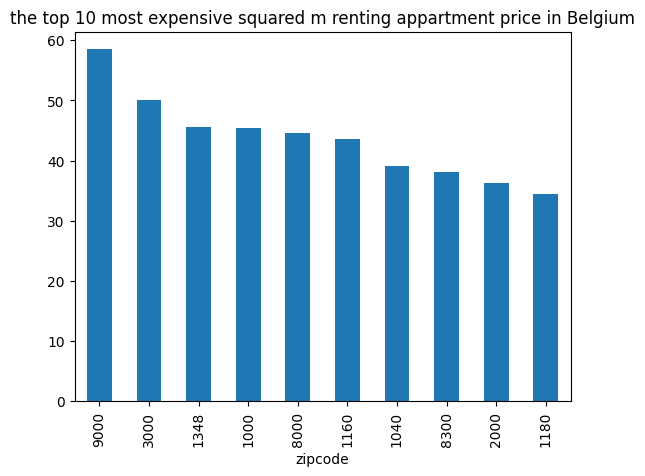

In [1715]:
top_10_squared.plot(x="zipcode", y='Mean price', kind='bar', title="the top 10 most expensive squared m renting appartment price in Belgium")
plt.xticks(rotation=90)
plt.show

In [ ]:
#Creating a dictionary by passing Series objects as values
frame = {'Mean price': mean_price, 'Median price': top_10_median, 'Squared m price' : top_10_squared}
#Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame)

print(result)

print(df_rent_appart.isnull().sum())

"""mean_price.plot(label='Mean price', color='orange')
top_10_median.plot(label='Median price')
top_10_squared.plot(label='Squared m price')

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# adding title to the plot
plt.title('Most expensive cities in Belgium')
  
# adding Label to the x-axis
plt.xlabel('Zip code')

plt.ylabel('Euros')
  
# adding legend to the curve
plt.legend()"""

         Mean price  Median price  Squared m price
zipcode                                           
1000        1573.05           NaN            45.45
1040        1543.58           NaN            39.07
1050        1835.79        1650.0              NaN
1060        1584.91        1515.0              NaN
1081            NaN        1650.0              NaN
1150        1737.32        1550.0              NaN
1160        1495.02           NaN            43.67
1180        1637.29        1400.0            34.47
1348            NaN           NaN            45.62
1380            NaN        1400.0              NaN
1933        1983.50        2072.5              NaN
2000            NaN           NaN            36.36
3000            NaN           NaN            50.00
3078            NaN        1400.0              NaN
8000            NaN           NaN            44.67
8300        1695.91        1450.0            38.12
9000            NaN           NaN            58.49
9080        1487.50        1487

"mean_price.plot(label='Mean price', color='orange')\ntop_10_median.plot(label='Median price')\ntop_10_squared.plot(label='Squared m price')\n\n# to set the plot size\nplt.figure(figsize=(16, 8), dpi=150)\n\n# adding title to the plot\nplt.title('Most expensive cities in Belgium')\n  \n# adding Label to the x-axis\nplt.xlabel('Zip code')\n\nplt.ylabel('Euros')\n  \n# adding legend to the curve\nplt.legend()"

In [ ]:
#df_rent_appart_brussels_province = df_rent_appart[df_rent_appart['zipcode'].astype(str).str.startswith("10","11","12")]
#df_rent_appart_brussels_province['zipcode'].value_counts()

#df_rent_appart.loc[(df_rent_appart['zipcode'] >= 1200) & (df_rent_appart['zipcode'] >= 23000 )]

#print(df_rent_appart_brussels_province['zipcode'].value_counts())
#df_rent_appart_brussels_province.groupby('Price')['Living Area'].mean()
#print(df_rent_appart_brussels_province['Price'].value_counts().head(50))